In [16]:
# All module imports
import tensorflow as tf
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout,Flatten,Dense
from sklearn.model_selection import train_test_split
import random

In [3]:
# Initialize data set directory name and allowed image file extensions
dataSetDir = "Data Set"
imageExt = ["jpg","png","jpeg","webp"]
newImageSize = (256,256)

In [4]:
# Prevent tensorflow from using all GPU resources
gpus = tf.config.experimental.list_physical_devices("GPU")
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

# Cosmetic Statement. Only changes how prints are displayed
np.set_printoptions(linewidth=200)

In [5]:
# Reads all images from all directories within the dataset directory, and puts them into features and labels
classLabel = 0
features = []
labels = []
for imageDir in os.listdir(dataSetDir):
    for image in os.listdir(os.path.join(dataSetDir,imageDir)):
        if image.split(".")[-1] in imageExt:
            imagePath = os.path.join(dataSetDir,imageDir,image)
            image = cv2.cvtColor(cv2.imread(imagePath),cv2.COLOR_BGR2RGB)
            image = cv2.resize(image,newImageSize)
            #print(image)
            features.append(image)
            labels.append(classLabel)
            #plt.imshow(image)
            #plt.show()
    classLabel+=1

# Shuffle the features and labels together, unpack them, then normalize the feature sizes from 0-255 to 0-1 pixels
#dataSet = list(zip(features,labels))
#np.random.shuffle(dataSet)
#features, labels = zip(*dataSet)
features = np.array(features)
labels = np.array(labels)
features = features / 255

In [6]:
trainingImages, testImages, trainingLabels, testLabels = train_test_split(
    features, labels, test_size=0.3, random_state = 42)
#i = 25
#plt.title(trainingLabels[i])
#plt.imshow(trainingImages[i])

In [9]:
model = Sequential()
# Input Layer
model.add(Conv2D(64, (3,3), input_shape=(256,256,3), activation="relu"))
model.add(MaxPooling2D(2,2))
# Hidden Layers
model.add(Conv2D(64, (3,3), activation="relu"))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128, (3,3), activation="relu"))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dense(64, activation="relu"))
# Output Layer
model.add(Dense(6,activation = "softmax"))
# Compile and summarize the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      36928     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 128)      

In [10]:
model.fit(trainingImages,trainingLabels,epochs=8)
model.evaluate(testImages,testLabels)

Epoch 1/8
3/3 [==============================] - 5s 1s/step - loss: 4.3416 - accuracy: 0.1250
Epoch 2/8
3/3 [==============================] - 4s 1s/step - loss: 2.0420 - accuracy: 0.1875
Epoch 3/8
3/3 [==============================] - 4s 1s/step - loss: 1.6241 - accuracy: 0.4500
Epoch 4/8
3/3 [==============================] - 4s 1s/step - loss: 1.3676 - accuracy: 0.4375
Epoch 5/8
3/3 [==============================] - 4s 1s/step - loss: 1.1043 - accuracy: 0.5625
Epoch 6/8
3/3 [==============================] - 4s 1s/step - loss: 0.8151 - accuracy: 0.6625
Epoch 7/8
3/3 [==============================] - 4s 1s/step - loss: 0.8419 - accuracy: 0.7000
Epoch 8/8
2/2 [==============================] - 1s 45ms/step - loss: 0.7012 - accuracy: 0.7714


[0.7012404799461365, 0.7714285850524902]

In [ ]:
results = np.array(model.predict(testImages))
plt.imshow(testImages[5])
for i in range(len(testLabels)):
    print(testLabels[i],":",results[i],":",max(results[i]))

In [11]:
model.save("./model.keras")

In [14]:
model2 = tf.keras.models.load_model("./model.keras")

35

AxesImage(shape=(256, 256, 3))
1/1 [==============================] - 0s 45ms/step
[[0.00638167 0.01929038 0.11905199 0.69619477 0.02325614 0.13582504]]
Bottle 0.69619477


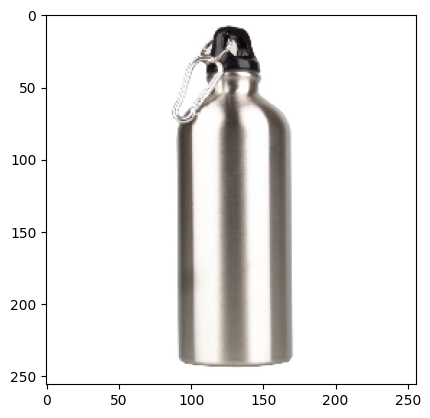

In [28]:
x = random.randint(0,len(testLabels))
image = testImages[x].reshape(1,256,256,3)
print(plt.imshow(testImages[x]))
res  = model2.predict(image, batch_size=1)
maxIndex = 0
print(res)
for i in range(len(res[0])):
  if res[0][i]>res[0][maxIndex]:
    maxIndex = i

di = {0 : "Apple", 1 : "Banana", 2 : "Book", 3 : "Bottle", 4: "Horlicks", 5:"Pen"}
print(di[maxIndex],res[0][maxIndex])